<center>
<h1> SOLUCIÓN TAREA 8 - Algoritmo de umbralización multinevel de Otsu
</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import data
from skimage.filters import threshold_multiotsu

En esta ocasión estudiaremos la umbralización multinivel de una imagen mediante el algoritmo de Otsu:

In [57]:
# Cargamos la imagen
img = cv2.imread("fig/car.jpg",0)
# plt.figure(1,figsize=(10,10))
# plt.imshow(img,cmap='gray')

Definimos la función para aplicar el algoritmo, la cual tendra como parametros la imagen original y el numero de niveles en los que queremos segmentar nuestra imagen:

In [7]:
def Otsu_Multinivel(img,niveles=3):
    # Aplicando el umbral multi-Otsu para n niveles
    umbrales = threshold_multiotsu(img,classes = niveles)
    # Utilizando los valores del umbral, generamos n regiones.
    regiones = np.digitize(img, bins=umbrales)
    return umbrales,regiones

Aplicamos nuestro algoritmo sobre la imagen:

In [58]:
umbrales,regiones = Otsu_Multinivel(img,niveles=3)

Gráficamos:

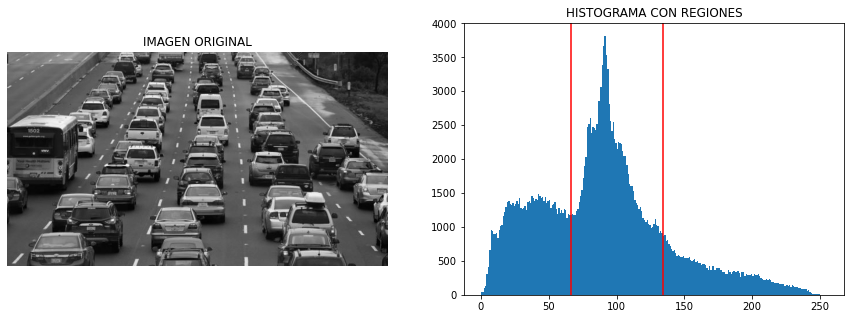

In [60]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('IMAGEN ORIGINAL')
plt.axis('off')
plt.subplot(122)
plt.hist(img.ravel(), bins=255)
plt.title('HISTOGRAMA CON REGIONES')
for umbral in umbrales:
    plt.axvline(umbral, color='r')
plt.show()

Observamos el histograma de la imagen y las tres regiones definidas con las que se realizara la umbralización.

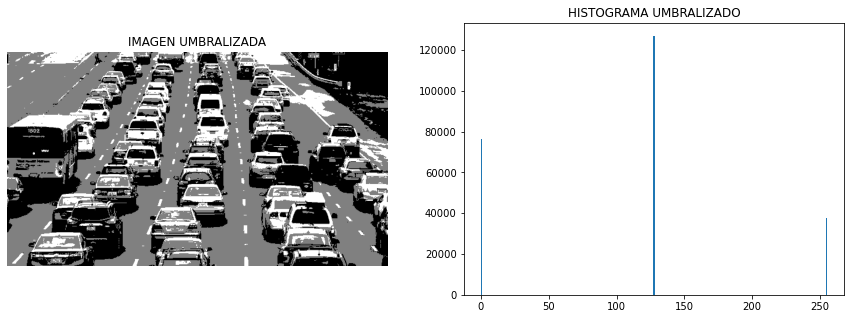

In [61]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.imshow(regiones, cmap='gray')
plt.title('IMAGEN UMBRALIZADA')
plt.axis('off')
plt.subplot(122)
plt.hist(regiones.ravel()*127.5, bins=255)
plt.title('HISTOGRAMA UMBRALIZADO')
plt.show()

Una vez realizada la umbralización podemos observar que el histograma solo presenta tres valores en 0, 125 y 255, lo cual era lo esperado, asi mismo se observa la construcción de la imagen apartir de solo estos valores, de esta manera si solo definieramos la umbralización en dos regiones veriamos una imagen en solo blanco y negro:

In [63]:
# Cargamos la imagen
plt.figure(1,figsize=(10,10))
img = cv2.imread("fig/persona.jpg",0)
umbrales,regiones=Otsu_Multinivel(img,niveles=2)

<Figure size 720x720 with 0 Axes>

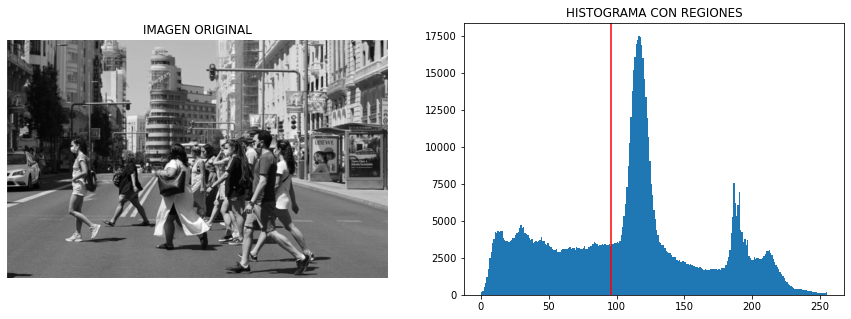

In [66]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('IMAGEN ORIGINAL')
plt.axis('off')
plt.subplot(122)
plt.hist(img.ravel(), bins=255)
plt.title('HISTOGRAMA CON REGIONES')
for umbral in umbrales:
    plt.axvline(umbral, color='r')
plt.show()

En esta ocasión el histograma se dividira en dos regiones:

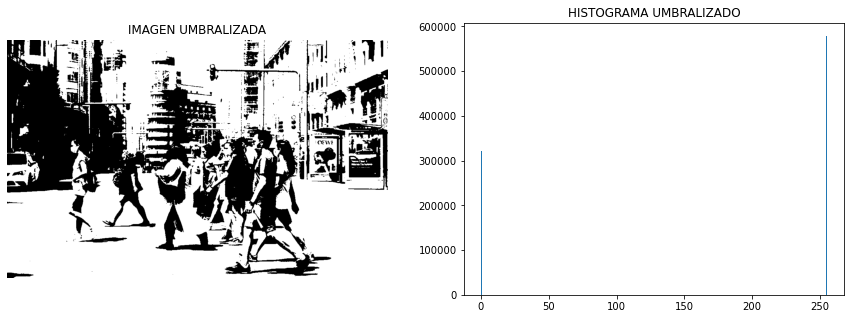

In [68]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.imshow(regiones, cmap='gray')
plt.title('IMAGEN UMBRALIZADA')
plt.axis('off')
plt.subplot(122)
plt.hist(regiones.ravel()*255, bins=255)
plt.title('HISTOGRAMA UMBRALIZADO')
plt.show()

Y obtenemos la imagen original con solo negro y blanco.